# Project: Investigate a Dataset - TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project we will be analyzing movie data from TMDb (The Movie Database) and focusing on which movie genres were most popular throughout the years as well the trend of their popularity. We will also be taking a took at which movie properties are associated with the highest revenue earning movies throughout the years 1960 to 2015. 

Questions: 
Which movie genres are most popular from year-to-year? 
What is the trend of popularity for movie genres from 1960 to 2015? 
What movie properties are associated with movies that bring in high revenue?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

In [3]:
df_tmdb = pd.read_csv("tmdb-movies.csv")
df_tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


First we will take a look at the data in order to get a better understanding of what it consists of... (rows, columns, datatypes, missing data, etc...)

In [4]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

There is quite a lot of missing data within columns such as id, homepage, tagline, overview, and such

In [5]:
df_tmdb.shape

(10866, 21)

In [6]:
df_tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The max runtime for a film looks to be at 900 minutes, which is a big outlier compared to the mean of 102. There is a very wide range of popularity with the min being 0.000065 and the max being 32.98. We can also assume from this data the newer the movie the more popular it is.


### Data Cleaning
 

Now we will clean up the data by dropping unnecessary columns and filling in missing data

In [7]:
df_tmdb.drop(['id', 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'runtime', 'release_date'], axis=1, inplace=True)

In [8]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(4), object(2)
memory usage: 849.0+ KB


Since the column 'genres' is an object datatype and not numeric data we will adjust accordingly with respect to that column specifically.

In [11]:
# missing data
df_tmdb[df_tmdb.genres.isnull()]

,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,0.244648,0,0,Belli di papÃ,NaN,21,6.1,2015,0.00000,0.0
620,0.129696,0,0,All Hallows' Eve 2,NaN,13,5.0,2015,0.00000,0.0
997,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,NaN,13,6.8,2014,0.00000,0.0
1712,0.302095,0,0,Prayers for Bobby,NaN,57,7.4,2009,0.00000,0.0
1897,0.020701,0,0,Jonas Brothers: The Concert Experience,NaN,11,7.0,2009,0.00000,0.0
2370,0.081892,0,0,Freshman Father,NaN,12,5.8,2010,0.00000,0.0
2376,0.068411,0,0,Doctor Who: A Christmas Carol,NaN,11,7.7,2010,0.00000,0.0
2853,0.130018,0,0,Vizontele,NaN,12,7.2,2001,0.00000,0.0
3279,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,NaN,11,6.1,2008,0.00000,0.0
4547,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,NaN,12,8.3,2012,0.00000,0.0


Since the data listed does not have useful information such as budget, revenue, or a genre listing. We will go ahead and drop this data

In [12]:
df_tmdb.dropna(inplace=True)
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10843 non-null float64
budget            10843 non-null int64
revenue           10843 non-null int64
original_title    10843 non-null object
genres            10843 non-null object
vote_count        10843 non-null int64
vote_average      10843 non-null float64
release_year      10843 non-null int64
budget_adj        10843 non-null float64
revenue_adj       10843 non-null float64
dtypes: float64(4), int64(4), object(2)
memory usage: 931.8+ KB


This dataframe looks much cleaner now and is ready for further data analysis. Lastly, we will get basic histograms to see general trends within the data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fea06768d30>,
      dtype=object)

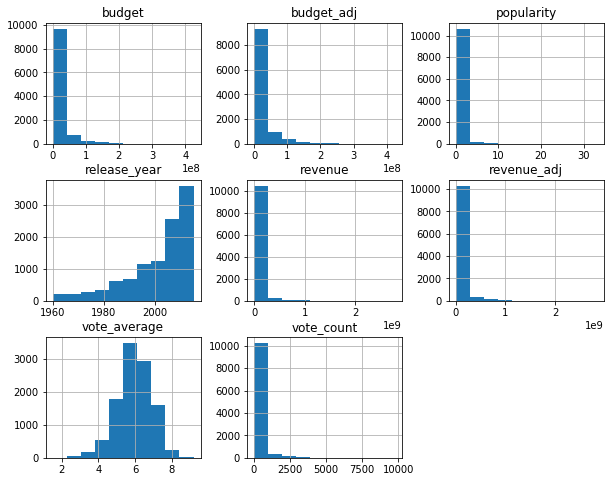

In [33]:
df_tmdb.hist(figsize=(10,8))

We can see that the release_year data is very skewed to the left with many more films released in recent years (2000+) compared to older films being included in the data. We can also see that the vote_average has a fairly normal distribution and the mean is right around 6 which correlates with the mean (5.97) pulled from earlier in .describe().

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Which movie genres are most popular from year-to-year?  

First, we will do a simple parse and comb through each listed year of release in order to check and see which movie genre is the most popular of that respective year.

In [13]:
year_list = []
for year in df_tmdb['release_year']: #parsing the dataframe's column 'release_year'
    if year not in year_list:        
        year_list.append(year)       #if the year is not already included in the year_list, append it in
    elif year in year_list:
        continue
year_list.sort()
print(year_list)

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


Now that we have our assorted year of release list, we will check each year's highest popularity scorings and match to their respective genres

In [14]:
popularity_list = []
temp = []
for year in year_list:                   #parsing the list of years taken from earlier
    for i, row in df_tmdb.iterrows():    #parsing each row in the dataframe
        if year == row[7]:
            temp.append(row[0])          #if the year from the year_list matchs with the current df's row's year, then append it
        else:
            continue
    temp.sort(reverse=True)              #reverse sort from max to min popularity scoring values per year respective to year_list
    popularity_list.append(temp[0])      #takes the max popularity scoring for that year in respect to year_list
    temp = []
print(popularity_list)

[2.610362, 2.631987, 3.170651, 2.508235, 3.153791, 1.910465, 1.227582, 2.550704, 3.309196, 1.778746, 1.9369619999999999, 3.072555, 5.738034, 2.2724860000000002, 3.264571, 3.258151, 2.5826569999999998, 12.037933, 1.697618, 4.935897, 5.488441000000001, 4.5783, 4.215642, 4.828854, 4.831966, 6.095293, 2.485419, 3.474728, 3.7774410000000005, 4.143585, 2.679627, 3.852269, 4.586426, 2.571339, 8.09375399999999, 4.76535899999999, 4.480733, 6.66898999999999, 4.180540000000001, 8.947905, 4.271452, 8.575419, 8.095275, 7.122455, 5.827781, 5.939927, 5.838503, 4.965391, 8.46666799999999, 9.432768, 9.363643, 8.411577000000001, 7.637767, 6.112766000000001, 24.949134, 32.985763]


Here we have the assorted ascending max popularity scoring values. Now we will match to the respective movie genre(s).

In [15]:
#matches each year's max popularity scoring with the respective movie genres
genre_max = []
for scoring in popularity_list:         #parsing the max popularity scoring list
    for i, row in df_tmdb.iterrows():   
        if scoring == row[0]:
            genre_max.append(row[4])    #if the scoring match's the row's scoring, then append the movie genres
        else:
            continue
print(genre_max)

['Drama|Horror|Thriller', 'Adventure|Animation|Comedy|Family', 'Adventure|Action|Thriller', 'Action|Thriller|Adventure', 'Adventure|Action|Thriller', 'Adventure|Action|Thriller', 'Animation|Family|Comedy', 'Family|Animation|Adventure', 'Science Fiction|Mystery|Adventure', 'Adventure|Action|Thriller', 'Animation|Comedy|Family|Adventure', 'Science Fiction|Drama', 'Drama|Crime', 'Animation|Family', 'Drama|Crime', 'Drama', 'Crime|Drama', 'Adventure|Action|Science Fiction', 'Music', 'Horror|Action|Thriller|Science Fiction', 'Adventure|Action|Science Fiction', 'Adventure|Action', 'Science Fiction|Drama|Thriller', 'Adventure|Action|Science Fiction', 'Action|Thriller|Science Fiction', 'Adventure|Comedy|Science Fiction|Family', 'Horror|Action|Thriller|Science Fiction', 'Science Fiction|Action|Adventure|Thriller', 'Action|Thriller', 'Animation|Family', 'Action|Adventure|Science Fiction', 'Romance|Family|Animation|Fantasy|Music', 'Crime|Thriller', 'Romance|Fantasy|Drama|Comedy', 'Thriller|Crime',

Now we have matched each max popularity scoring with its respective genres.

We will seperate each movie genre into its own category and we can do this by separating substrings by the pipe "|" and adding them to a separate list to see what we are dealing with.

In [16]:
genre_list = []
for i in df_tmdb["genres"]:             
    if i in genre_list:                  #checking if a genre is already within the genre_list
        continue
    elif "|" in i:                       #Separating genres by substring "|"
        list = i.split("|")
        for j in list:
            if j in genre_list:          #checking if a genre is already within the genre_list
                continue
            elif j not in genre_list:    #if the genre is new, we append to the genre_list
                genre_list.append(j)
    else:
        if i not in genre_list:          #if there is no "|" located in the genre column and the movie is of 1 genre only
            genre_list.append(i)
print(genre_list)     

['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy', 'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy', 'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror', 'Documentary', 'TV Movie', 'Foreign']


We will plot the number of max popularity scores per movie genre and see which genres are ranked the highest.

[28, 30, 19, 19, 10, 7, 0, 13, 11, 9, 7, 3, 2, 0, 0, 2, 4, 0, 0, 0]


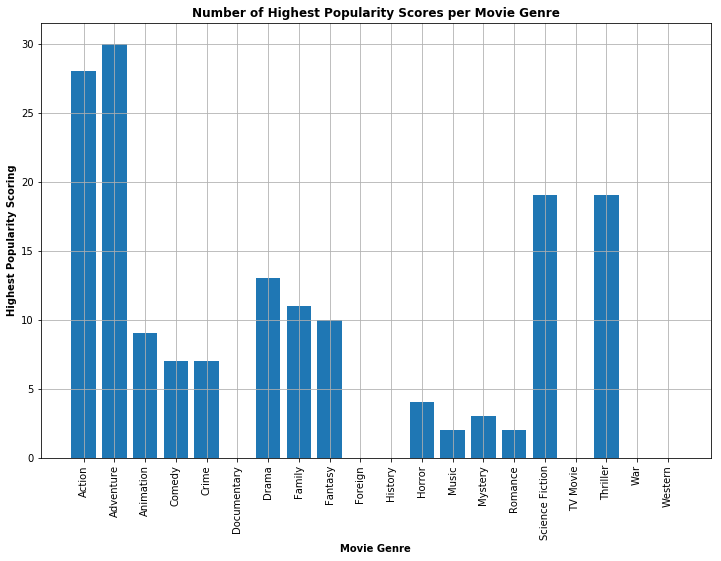

In [28]:
genre_count = []
count = 0
for genre in genre_list:       
    for i in genre_max:         #for each genre in genre_list, parse through each year's max popularity scoring genre list and see how many counts for each genre separately
        if genre in i:
            count += 1
    genre_count.append(count)   #append the count +1 for each genre that is matched
    count = 0
print(genre_count)
plt.figure(figsize=(12,8))
plt.bar(genre_list, genre_count)
plt.xticks(rotation = 90)
plt.xlabel('Movie Genre',fontweight="bold")
plt.ylabel('Highest Popularity Scoring',fontweight="bold")
plt.title("Number of Highest Popularity Scores per Movie Genre",fontweight="bold")
plt.grid(True)
plt.show()

We can observe from here how many max scores each genre has totaled from 1960 to 2015. This includes if it's combined with another genre ofcourse. We can see from this that the movie genres Documentary, Foreign, History, TV Movie, War, and Western amassed a total of zero highest popularity scorings for any of the years between 1960 to 2015. We will now clean up the data by removing these movie genres in order to get a better overall view with a pie chart.

In [18]:
cleaned_genre_count = []
for number in genre_count:
    if number > 0:                 #checking if each count is above 0, in order to clean up genres with zero highest popularity scorings across the range of years from 1960 to 2015
        cleaned_genre_count.append(number)
print(cleaned_genre_count)

[28, 30, 19, 19, 10, 7, 13, 11, 9, 7, 3, 2, 2, 4]


We have just removed all values of 0 scorings for their respective genres (Documentary, Foreign, History, TV Movie, War, Western)

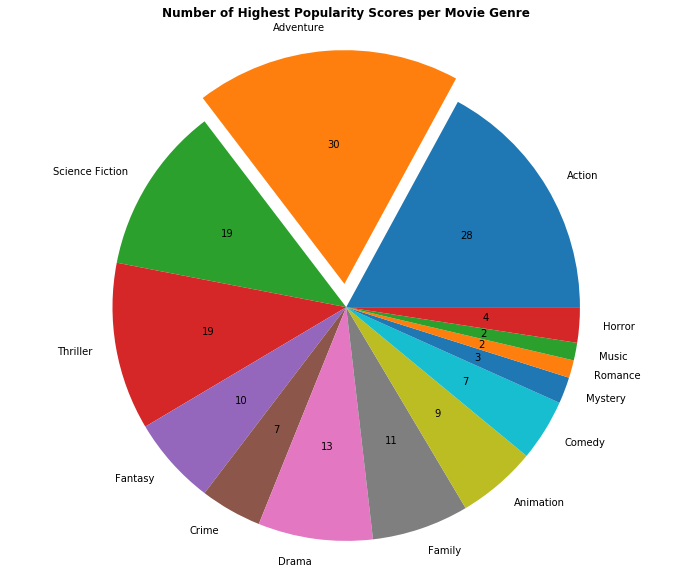

In [19]:
a = ['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy', 'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy', 'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror', 'Documentary', 'TV Movie', 'Foreign']
b = ['Western', 'War', 'History', 'Documentary', 'TV Movie', 'Foreign']
cleaned_genre_list = [x for x in a if (x not in b)]
total = sum(cleaned_genre_count)
explode = [0,0.1,0,0,0,0,0,0,0,0,0,0,0,0,]
plt.figure(figsize =(12, 10))
plt.pie(cleaned_genre_count, explode=explode, autopct=lambda x: '{:.0f}'.format(x*total/100), labels = cleaned_genre_list)
plt.title("Number of Highest Popularity Scores per Movie Genre",fontweight="bold")
plt.axis('equal')
plt.show()

We can clearly see that the 'Adventure' movie genre has the highest number of max popularity scores ranging from years 1960 to 2015 (65 values) with a value of 30 of those years. This is followed close by 'Action' in second with a number of 28 years of max popularity scores. Music, Romance, Mystery, and Horror ranked the lowest of all the genres.

Next, we will see the relationship between movie genres and their respective mean scorings over all the listed years. We will compare these mean popularity scorings to the max popularity scorings as observed earlier in order to see how consistently popular these genres are ranked.

['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy', 'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy', 'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror', 'Documentary', 'TV Movie', 'Foreign']
[0.9261361362683438, 1.1542590441876273, 1.0012182861788617, 0.7415130845942229, 0.9928397063318777, 0.7448208509225092, 0.5906154787878787, 0.5914963547574038, 0.786668393988627, 0.8521816523605149, 0.5926073422093329, 0.6900121320987652, 0.5920820490654205, 0.7276831481481482, 0.5759359431137724, 0.48732118382352935, 0.4653566304215027, 0.18143162499999996, 0.27089576047904185, 0.19149632446808507]


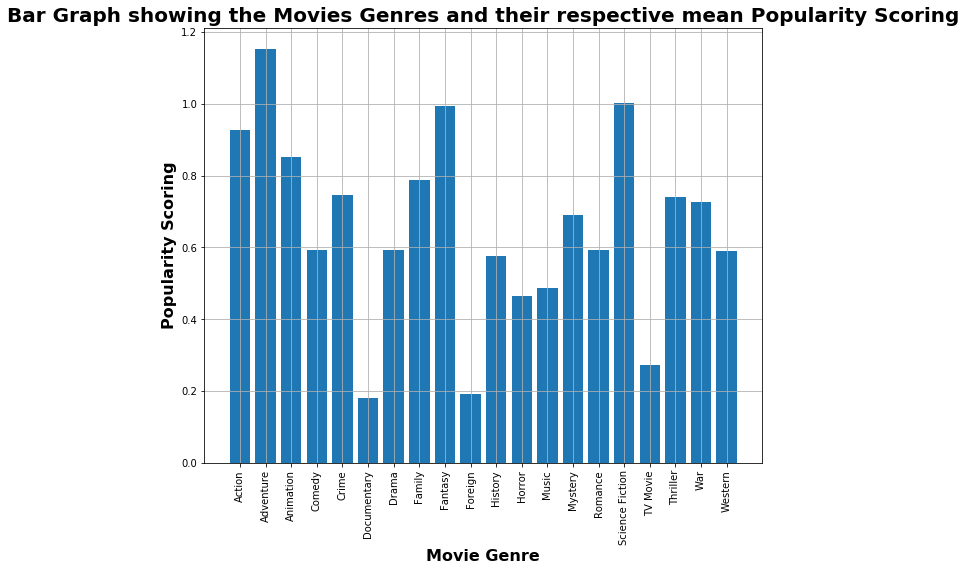

In [20]:
mean_list = []
for genre in genre_list:
    genre_str = genre                                                            #doublecheck: genre to string object
    genre = df_tmdb.loc[df_tmdb['genres'].str.contains(genre, case=False)]       #locate a string in the dataframe in the 'genres' column
    mean_list.append(genre['popularity'].mean())                                 #take the overall average for each genre's popularity scroing

print(genre_list)
print(mean_list)
plt.figure(figsize=(10,8))
plt.xticks(rotation = 90)
plt.xlabel('Movie Genre', fontsize=16,fontweight="bold")
plt.ylabel('Popularity Scoring', fontsize=16,fontweight="bold")
plt.title('Bar Graph showing the Movies Genres and their respective mean Popularity Scoring', fontsize=20,fontweight="bold")
plt.bar(genre_list, mean_list)
plt.grid(True)
plt.show()

Here we can see the top 5 movie genres with the highest averages from the years 1960 to 2015 are Adventure, Science Fiction, Fantasy, Action, and Animation with 1.154, 1.001, 0.992, 0.926, 0.852 respective in that order with Adventure, Science Fiction, and Action being highly ranked from earlier shown in the pie chart. Fantasy and Animation have a much lower number of highest popularity rankings per year as observed in the pie chart earlier even though both have very high consistent averages. We can also observe how genres such as Documentary, Foreign, and TV Movie are ranked with very low averages. This could correlate to why these genres weren't able to rank at all on the max popularity scorings per year bar graph/pie chart from earlier.

### Research Question 2: What is the trend of popularity for movie genres from 1960 to 2015?

Next, we will dive deeper into each movie genre's popularity scoring over the years to see how it has changed and possibly why.

In [21]:
action = df_tmdb.loc[df_tmdb['genres'].str.contains("Action", case=False)]
adventure = df_tmdb.loc[df_tmdb['genres'].str.contains("Adventure", case=False)]
science_fiction = df_tmdb.loc[df_tmdb['genres'].str.contains("Science Fiction", case=False)]
thriller = df_tmdb.loc[df_tmdb['genres'].str.contains("Thriller", case=False)]
fantasy = df_tmdb.loc[df_tmdb['genres'].str.contains("Fantasy", case=False)]
crime = df_tmdb.loc[df_tmdb['genres'].str.contains("Crime", case=False)]
western = df_tmdb.loc[df_tmdb['genres'].str.contains("Western", case=False)]
drama = df_tmdb.loc[df_tmdb['genres'].str.contains("Drama", case=False)]
family = df_tmdb.loc[df_tmdb['genres'].str.contains("Family", case=False)]
animation = df_tmdb.loc[df_tmdb['genres'].str.contains("Animation", case=False)]
comedy = df_tmdb.loc[df_tmdb['genres'].str.contains("Comedy", case=False)]
mystery = df_tmdb.loc[df_tmdb['genres'].str.contains("Mystery", case=False)]
romance = df_tmdb.loc[df_tmdb['genres'].str.contains("Romance", case=False)]
war = df_tmdb.loc[df_tmdb['genres'].str.contains("War", case=False)]
history = df_tmdb.loc[df_tmdb['genres'].str.contains("History", case=False)]
music = df_tmdb.loc[df_tmdb['genres'].str.contains("Music", case=False)]
horror = df_tmdb.loc[df_tmdb['genres'].str.contains("Horror", case=False)]
documentary = df_tmdb.loc[df_tmdb['genres'].str.contains("Documentary", case=False)]
tv_movie = df_tmdb.loc[df_tmdb['genres'].str.contains("TV Movie", case=False)]
foreign = df_tmdb.loc[df_tmdb['genres'].str.contains("Foreign", case=False)]

Substring search within a string is included above to make the next few steps much easier to do as we define the function. 

Now, we will parse through the entire cleaned up dataframe (df_tmdb) in order to separate and append popularity values to their respective year of release for each genre and compare.

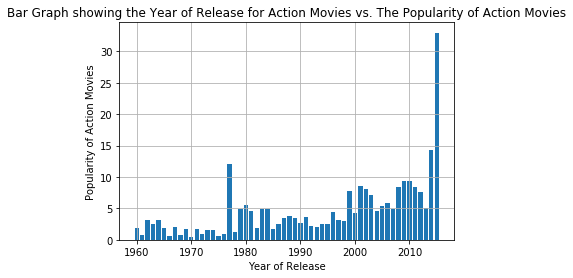

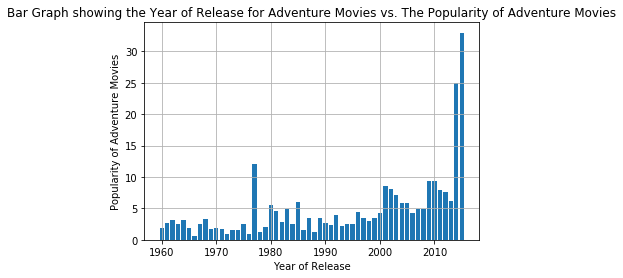

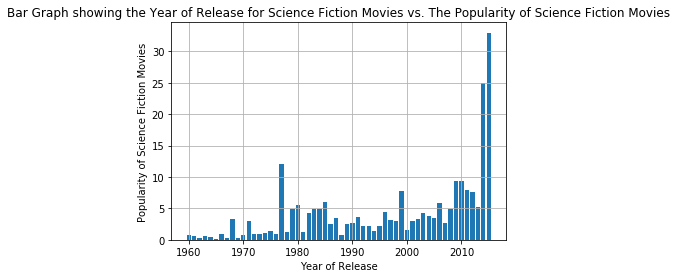

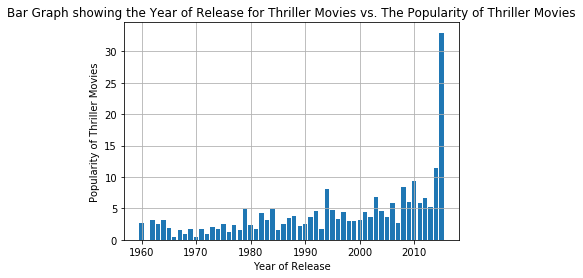

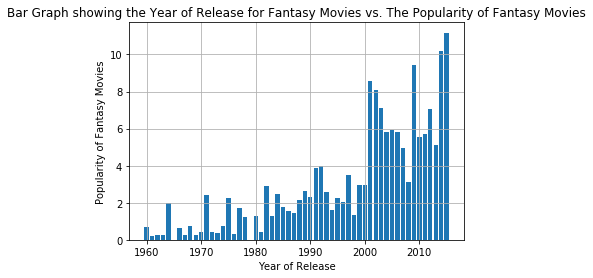

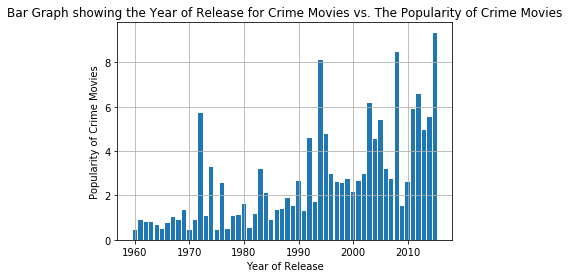

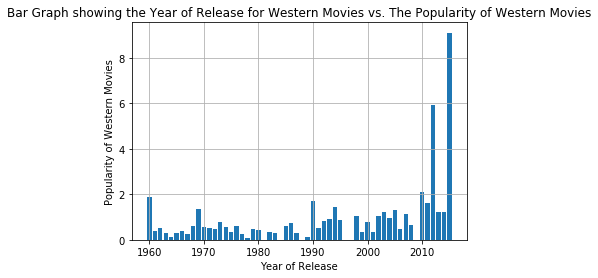

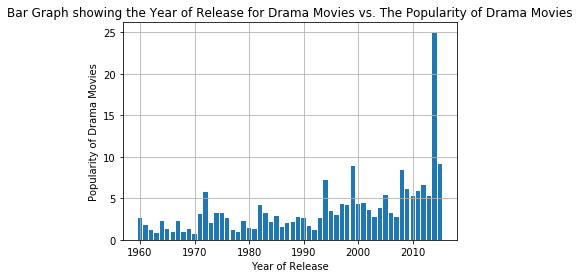

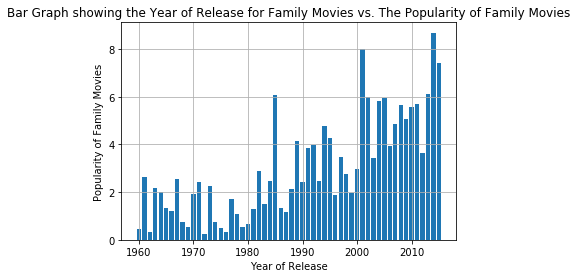

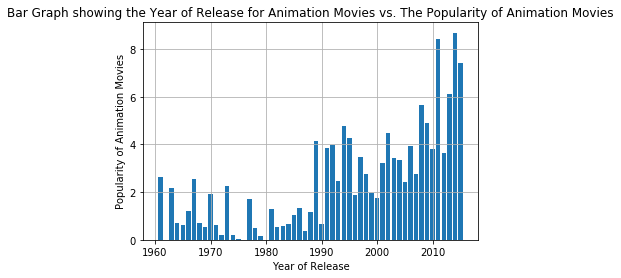

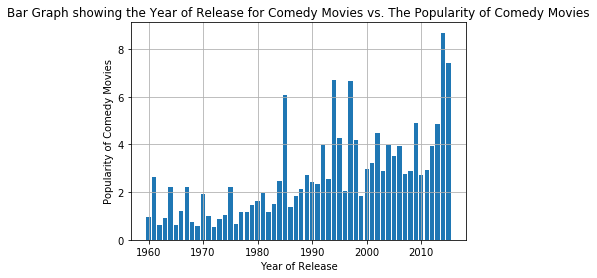

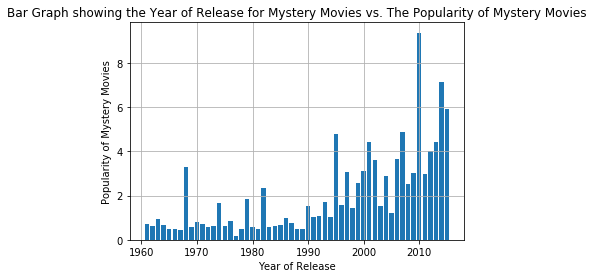

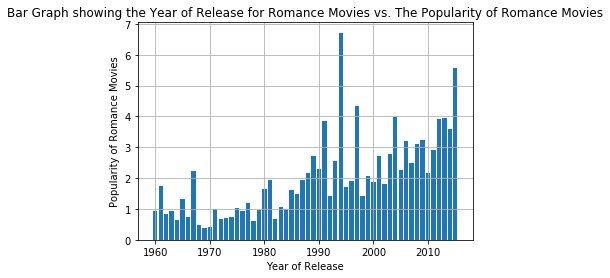

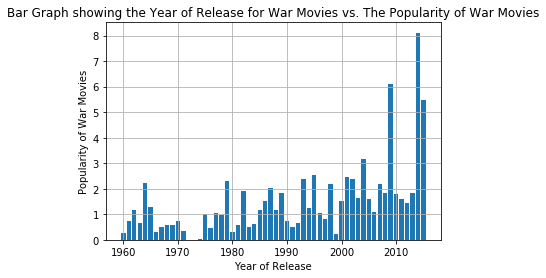

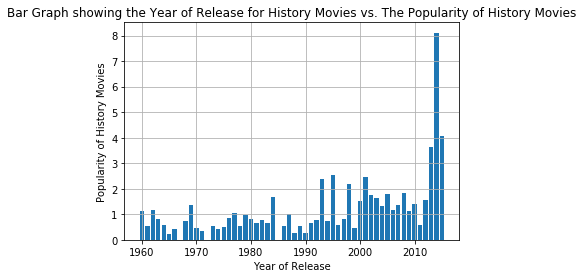

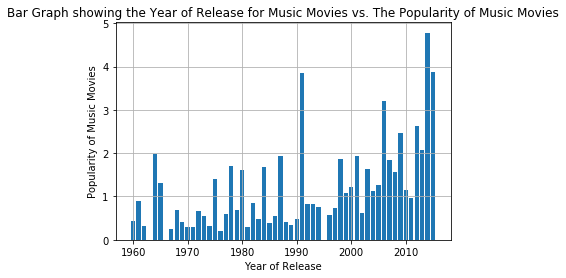

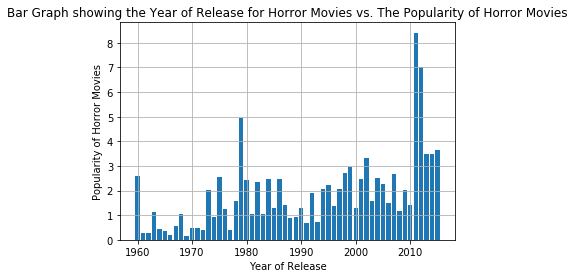

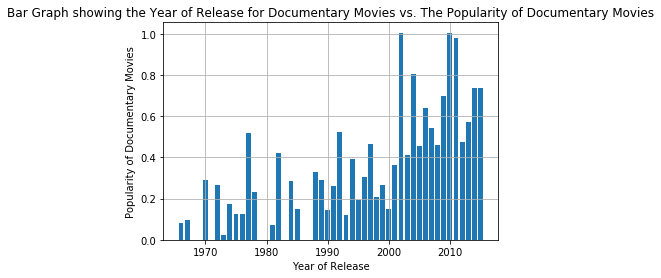

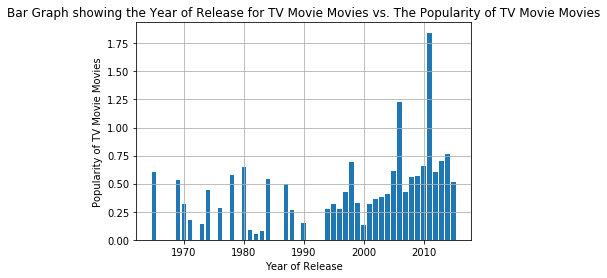

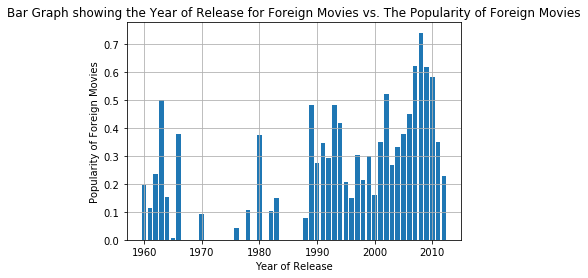

In [22]:
pop_list = []
year_list = []
def genre_pop(x):
    global count
    global pop_list
    global year_list
    if genre in genre_list:
        for i, row in df_tmdb.iterrows():              #parsing through each row of the dataframe for each action
            if genre in row[4]:                        
                pop_list.append(row[0])                #if the genre substring matches in the row's genre string, append the popularity scoring for that genre
                year_list.append(row[7])               #append the year for that genre's popularity scoring       
                
    plt.bar(year_list, pop_list)
    plt.xlabel('Year of Release')
    plt.ylabel('Popularity of ' + x + ' Movies')
    plt.title('Bar Graph showing the Year of Release for ' + x + ' Movies vs. The Popularity of ' + x + ' Movies')
    plt.grid(True)
    plt.show()
    
    pop_list = []
    year_list = []
    
for genre in genre_list:
    genre_pop(genre)

Here we can look at each bar graph for each movie genre and observe their respective trend over the years. We notice that almost every single movie genre is strongly skewed towards the left with the exception of Foreign, TV Movie, and Documentary (roughly skewed) and the popularity scoring increased more and more over the years. Something that is also apparent is the max popularity scoring for each music genre seems to be hovering around 2010+. Could this be because there are more movies with more vote counts and higher averages as the years progressed towards the 2000s and 2010s?

214421

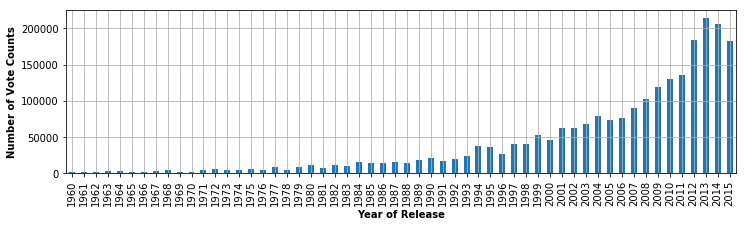

In [23]:
df_tmdb.groupby('release_year').vote_count.sum().plot(kind='bar', figsize=(12,3))   #display the sum of the vote counts of all movies for each each year (by grouping the year)
plt.ylabel("Number of Vote Counts",fontweight="bold")
plt.xlabel("Year of Release",fontweight="bold")
plt.grid(True)
df_tmdb.groupby('release_year').vote_count.sum().max()

There is a strong left skew in total vote counts per year similar to the left skewing from earlier for popularity scorings per year for each movie genre. We notice that most of the total sum vote counts increase greatly from 2005 to 2015 with the max vote count being as high as 214,421 votes in 2013. Having much higher vote counts between these years could correlate to why popularity is much higher across all genres of movies.

6.703636363636363

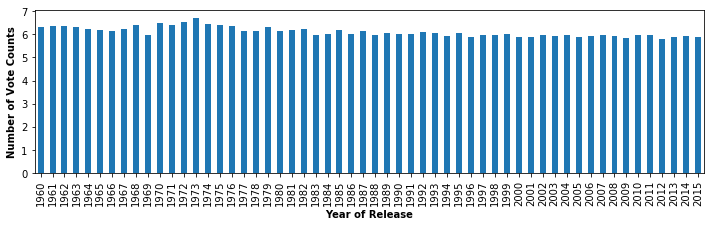

In [24]:
df_tmdb.groupby('release_year').vote_average.mean().plot(kind='bar', figsize=(12,3))    #display the vote averages of all movies for each each year (by grouping the year)
plt.ylabel("Number of Vote Counts",fontweight="bold")
plt.xlabel("Year of Release",fontweight="bold")
df_tmdb.groupby('release_year').vote_average.mean().min()
df_tmdb.groupby('release_year').vote_average.mean().max()

Even though there are more vote counts from 2005-2015. The average vote across all movie genres is very stable ranging between 5.79 and 6.7 between years 1960 and 2015. We were able to see this normal distribution earlier during the general overview with histograms. So, we can omit vote average as a potential factor of correlation to popularity.

### Research Question 3: What movie properties are associated with movies that bring in high revenue?

Lastly, we will observe which movies bring in the highest revenue and their associated movie genre

Text(0.5,1,'Top 10 Movies with the Highest Revenue Adjusted for Inflation')

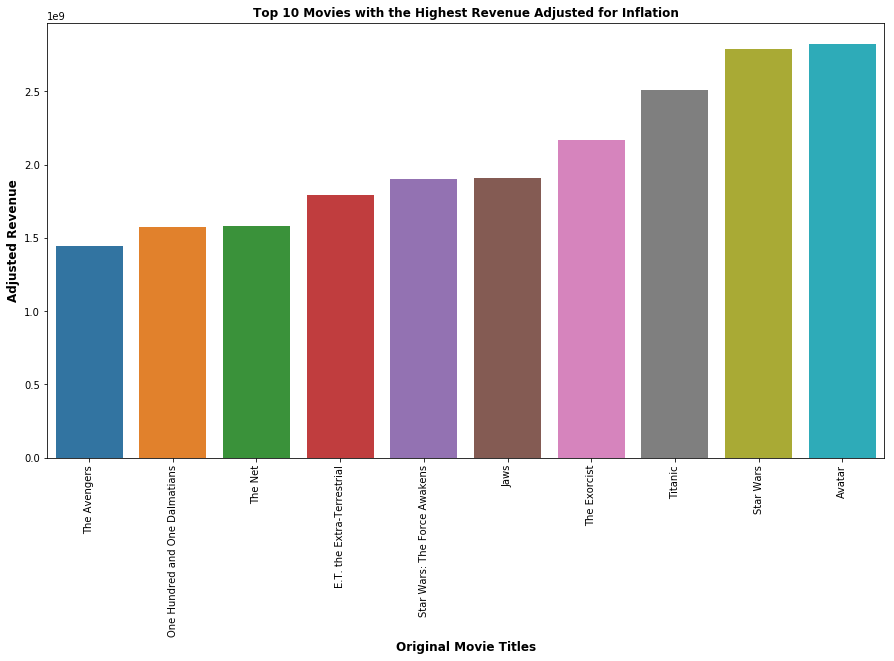

In [27]:
rev_adj_df = df_tmdb.sort_values(by=['revenue_adj']).tail(10)   #highest ranking movies with highest revenue adjusted for inflation
plt.figure(figsize=(15,8))
plt.xticks(rotation = 90)
plt.legend()
ax = sns.barplot(x='original_title', y='revenue_adj', data=rev_adj_df)    #plot using Seaborn to visualize an ascending order
ax.set_xlabel("Original Movie Titles", fontsize = 12,fontweight="bold")
ax.set_ylabel("Adjusted Revenue", fontsize = 12,fontweight="bold")
ax.set_title("Top 10 Movies with the Highest Revenue Adjusted for Inflation",fontweight="bold")

We can see the top highest revenue earning movies here adjusted for inflation

[5, 7, 5, 4, 3, 1, 0, 3, 2, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0]


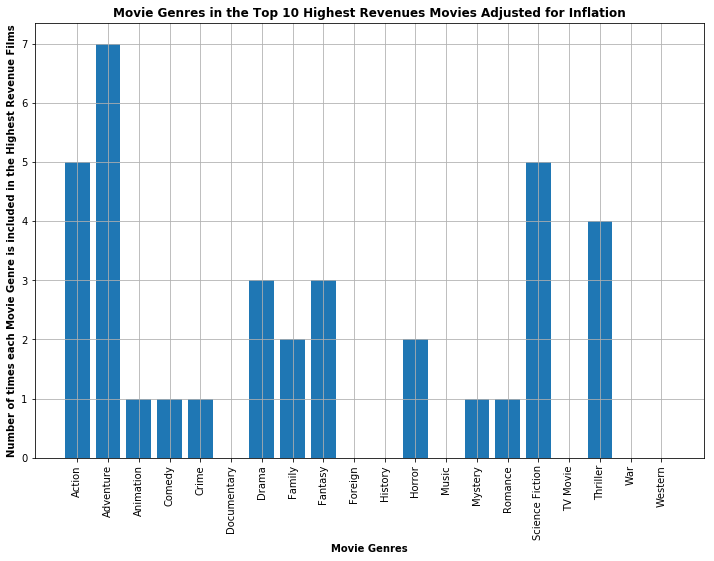

In [29]:
genre_count = []
count = 0
for genre in genre_list:
    for i in rev_adj_df.genres:        #for each genre in genre_list, parse through each movie's genre list and see how many counts for each genre separately
        if genre in i:
            count += 1
    genre_count.append(count)          #append the count +1 for each genre that is matched
    count = 0
print(genre_count)
plt.figure(figsize=(12,8))
plt.bar(genre_list, genre_count)
plt.xticks(rotation = 90)
plt.xlabel('Movie Genres',fontweight="bold")
plt.ylabel('Number of times each Movie Genre is included in the Highest Revenue Films',fontweight="bold")
plt.title("Movie Genres in the Top 10 Highest Revenues Movies Adjusted for Inflation",fontweight="bold")
plt.grid(True)
plt.show()

We can see that movie genres such as Adventure, Action, and Science Fiction are included in at least half of the top 10 highest revenue earning movies. 

<a id='conclusions'></a>
## Conclusions

We have analyzed The Movie Database data respective to each movie genre's highest popularity scoring count from the years 1960 to 2015 and found that the top highest scored movie genres were Adventure, Action, Science Fiction, Thriller, and Drama in that order. This correlated with the average popularity data over time for three out of five of these genres with Adventure, Science Fiction, and Action ranking in the top 5 average popularity scoring. We can conlude that the Adventure, Science Fiction, and Action movie genres are the most popular movie genres over this period of time.

We observed the popularity trend for every movie genre over the years and found that almost every movie genre's popularity trend strongly skewed left and increased more and more over the years with the exception of Foreign, TV Movie, and Documentary being very roughly skewed left and not as noticeable of a positive increase. TV Movie, Documentary, and Foreign were also among the lowest ranking average popularity scorings and not even ranked on any year's max popularity scoring observed in the first question. To better observe popularity trend, the total vote counts were gathered for each year and found that the trend was very skewed left with more and more people voting over the course of time. This could be a direct correlation to the ever increasing movie genre popularity across almost all of the genres. Voting averages were looked at for each year to see if correlated with popularity but no correlation could be observed from this data as it was very evenly distributed with a small range between the minimum and maximum scoring. We can conclude that popularity for all movies genres have strongly increased over time with the exception of Foreign, TV Movie, and Documentary being a much rougher observation in increase.

Lastly, we looked at which movie genres were associated with the top movies with the highest earning revenues adjusted for inflation and found that Adventure, Action, and Science Fiction were included in at least half of the top ten highest earning movies, with Adventure being included in seven out of the ten respectively. However, a limitation that could be observed further is each movie's respective budget. Further analysis could be shown to see if there is a positive correlation between movie budget vs. movie earnings. This could possibly show if genres that are associated with high budget movies are much more popular and earn more revenue, which could prove to be difficult for movie genres that aren't able to acquire such a high budget. This could bring up further questions such as why are lower ranked movie genres in popularity, revenue, and voting not able to obtain the resources needed to earn a high revenue and garner greater interest? Why are these genres ranked lower in these categories at all? Overall, we can conclude that movie genres that are very popular with audiences and that have the highest earnings are typically categorized as Adventure, Action, and Science Fiction. 

In [34]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0